In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [127]:
#%xmode Minimal

### Предобработка

In [128]:
df = pd.read_csv(r'C:\hackathon_sber_pm_2023\Доставка_продуктов.csv', sep=';', encoding='windows-1251')
df.head()

,case,stage,start_time,end_time
0,77654086061,Заказ оформлен,05.10.2022 17:57,05.10.2022 17:57
1,77654086061,Поступление заказа сборщику,05.10.2022 17:57,05.10.2022 17:58
2,77654086061,Сборка заказа,05.10.2022 17:58,05.10.2022 18:22
3,77654086061,Упаковка товара,05.10.2022 18:22,05.10.2022 18:24
4,77654086061,Оплата,05.10.2022 18:24,05.10.2022 18:24


In [129]:
#перевел время в нормальный формат
df['start_time'] = pd.to_datetime(df.start_time, format='%d.%m.%Y %H:%M')
df['end_time'] = pd.to_datetime(df.end_time, format='%d.%m.%Y %H:%M')

In [130]:
#время каждой операции в минутах
df['op_time_minutes'] = (df.end_time.astype('int64') - df.start_time.astype('int64')) // 10**9 / 60

#день начала и конца каждой операции
df['start_time_day'] = df.start_time.dt.date
df['end_time_day'] = df.start_time.dt.date

In [131]:
df.head(3)

,case,stage,start_time,end_time,op_time_minutes,start_time_day,end_time_day
0,77654086061,Заказ оформлен,2022-10-05 17:57:00,2022-10-05 17:57:00,0.0,2022-10-05,2022-10-05
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:00,2022-10-05 17:58:00,1.0,2022-10-05,2022-10-05
2,77654086061,Сборка заказа,2022-10-05 17:58:00,2022-10-05 18:22:00,24.0,2022-10-05,2022-10-05


In [132]:
df[df.case==37466784704]

,case,stage,start_time,end_time,op_time_minutes,start_time_day,end_time_day
178828,37466784704,Заказ оформлен,2022-12-06 11:15:00,2022-12-06 11:15:00,0.0,2022-12-06,2022-12-06
178829,37466784704,Поступление заказа сборщику,2022-12-06 11:16:00,2022-12-06 11:17:00,1.0,2022-12-06,2022-12-06
178830,37466784704,Сборка заказа,2022-12-06 11:41:00,2022-12-06 12:05:00,24.0,2022-12-06,2022-12-06
178831,37466784704,Упаковка товара,2022-12-06 12:07:00,2022-12-06 12:09:00,2.0,2022-12-06,2022-12-06
178832,37466784704,Оплата,2022-12-06 12:10:00,2022-12-06 12:10:00,0.0,2022-12-06,2022-12-06
178833,37466784704,Передача товара курьеру,2022-12-06 12:15:00,2022-12-06 12:20:00,5.0,2022-12-06,2022-12-06
178834,37466784704,Доставка заказа,2022-12-06 12:20:00,2022-12-06 12:51:00,31.0,2022-12-06,2022-12-06
178835,37466784704,Проверка заказа,2022-12-06 12:51:00,2022-12-06 12:52:00,1.0,2022-12-06,2022-12-06
178836,37466784704,Отмена заказа,2022-12-06 12:52:00,2022-12-06 12:53:00,1.0,2022-12-06,2022-12-06
178837,37466784704,Заказ доставлен,2022-12-06 12:53:00,2022-12-06 12:53:00,0.0,2022-12-06,2022-12-06


## Расчёт хронометража

In [133]:
sns.set_theme()
sns.set(rc={'figure.figsize':(6,3)})

In [134]:
#Сводная таблица суммы времени выполнения каждой стадии для каждого кейса
stage_sum_pivot = df.pivot_table(index = 'case',
              columns ='stage',
              values = 'op_time_minutes',
              aggfunc = "sum").fillna(0)
stage_sum_pivot.shape

(19988, 11)

In [135]:
stage_sum_pivot['Длительность'] = stage_sum_pivot['Доставка заказа']+\
                                stage_sum_pivot['Заказ доставлен']+\
                                stage_sum_pivot['Заказ оформлен']+\
                                stage_sum_pivot['Звонок клиенту']+\
                                stage_sum_pivot['Оплата']+\
                                stage_sum_pivot['Отмена заказа']+\
                                stage_sum_pivot['Передача товара курьеру']+\
                                stage_sum_pivot['Поступление заказа сборщику']+\
                                stage_sum_pivot['Проверка заказа']+\
                                stage_sum_pivot['Сборка заказа']+\
                                stage_sum_pivot['Упаковка товара']

In [136]:
stage_sum_pivot.head(1)

stage,Доставка заказа,Заказ доставлен,Заказ оформлен,Звонок клиенту,Оплата,Отмена заказа,Передача товара курьеру,Поступление заказа сборщику,Проверка заказа,Сборка заказа,Упаковка товара,Длительность
case,,,,,,,,,,,,
10007845189,33.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,24.0,2.0,67.0


In [137]:
des = stage_sum_pivot.describe(include='all').transpose().fillna(0)
des = des.drop(["25%", "75%"], axis=1).rename(columns={"50%":"median"})
des['mean/med'] = des['mean']/des['median']
des  = des.sort_values("mean", ascending=False) #Отсортировал по среднему
des.round(2)

,count,mean,std,min,median,max,mean/med
stage,,,,,,,
Длительность,19988.0,68.83,19.80,0.0,66.0,162.0,1.04
Доставка заказа,19988.0,29.13,10.05,0.0,32.0,35.0,0.91
Сборка заказа,19988.0,27.13,8.97,0.0,24.0,49.0,1.13
Передача товара курьеру,19988.0,5.98,8.83,0.0,4.0,41.0,1.49
Поступление заказа сборщику,19988.0,2.30,5.77,0.0,1.0,66.0,2.30
Упаковка товара,19988.0,2.02,0.77,0.0,2.0,8.0,1.01
Проверка заказа,19988.0,1.28,0.80,0.0,2.0,3.0,0.64
Оплата,19988.0,0.42,0.50,0.0,0.0,2.0,inf
Звонок клиенту,19988.0,0.40,1.22,0.0,0.0,19.0,inf


In [138]:
des2 = des[des['mean'] > 2]
sns.set(rc={'figure.figsize':(12,6)})

([<matplotlib.patches.Wedge at 0x123bc9db8d0>,
 [Text(-0.02907135550026731, 1.0996157766644572, 'Длительность'),
  Text(-0.820573445767208, -0.7325702833870146, 'Доставка заказа'),
  Text(0.49176379848950963, -0.9839554697724736, 'Сборка заказа'),
  Text(1.037353209931845, -0.3659211907557386, 'Передача товара курьеру'),
  Text(1.0881283418333896, -0.1611729248320525, 'Поступление заказа сборщику'),
  Text(1.0987943418070478, -0.0514878083901075, 'Упаковка товара')])

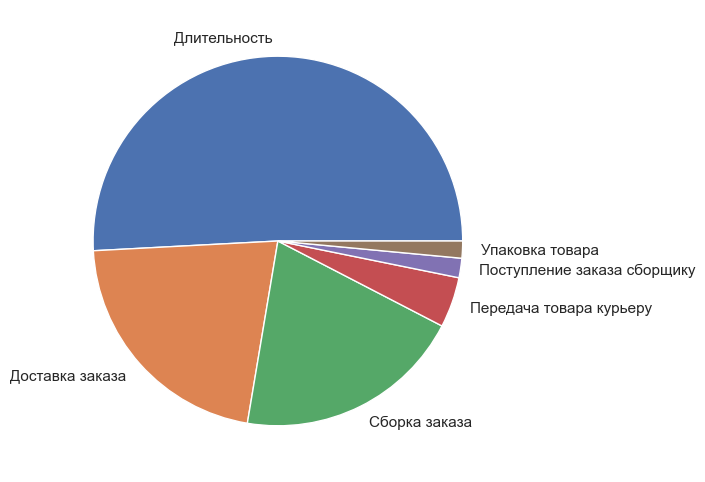

In [139]:
plt.pie(des2['mean'], labels=des2.index)

<Axes: xlabel='stage'>

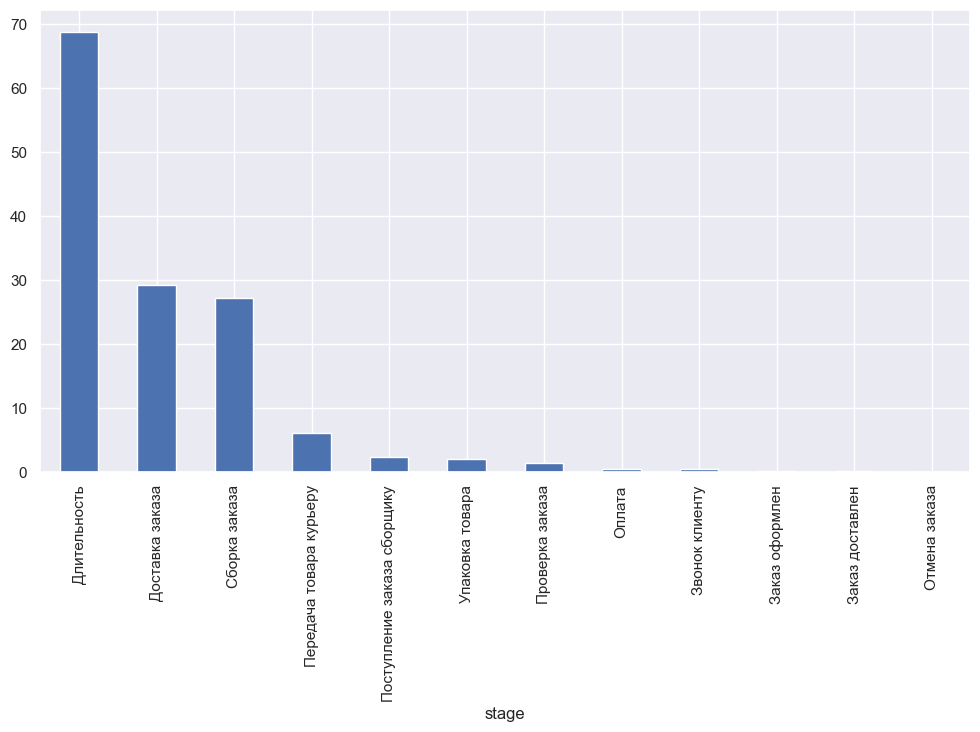

In [140]:
des['mean'].transpose().plot(kind='bar', stacked=True)

In [141]:
stage_sum_pivot[stage_sum_pivot['Длительность'] <= 45].index

Index([10017161163, 10040881505, 10112074232, 10140436665, 10147497683,
       10177023046, 10198086338, 10288104757, 10307806078, 10339307808,
       ...
       89666782634, 89679934684, 89702689864, 89739527107, 89815076109,
       89825500768, 89915111140, 89918315836, 89919423226, 89987328229],
      dtype='int64', name='case', length=1774)

In [142]:
stage_sum_pivot.drop(stage_sum_pivot[stage_sum_pivot['Длительность'] <= 10].index, inplace = True)

In [143]:
stage_sum_pivot['Длительность//10*10'] = stage_sum_pivot['Длительность']//10*10

In [144]:
chrono_distribution = stage_sum_pivot.loc[:, ["Длительность//10*10"]].\
            reset_index().groupby("Длительность//10*10").agg("count")

<Axes: xlabel='Длительность//10*10', ylabel='case'>

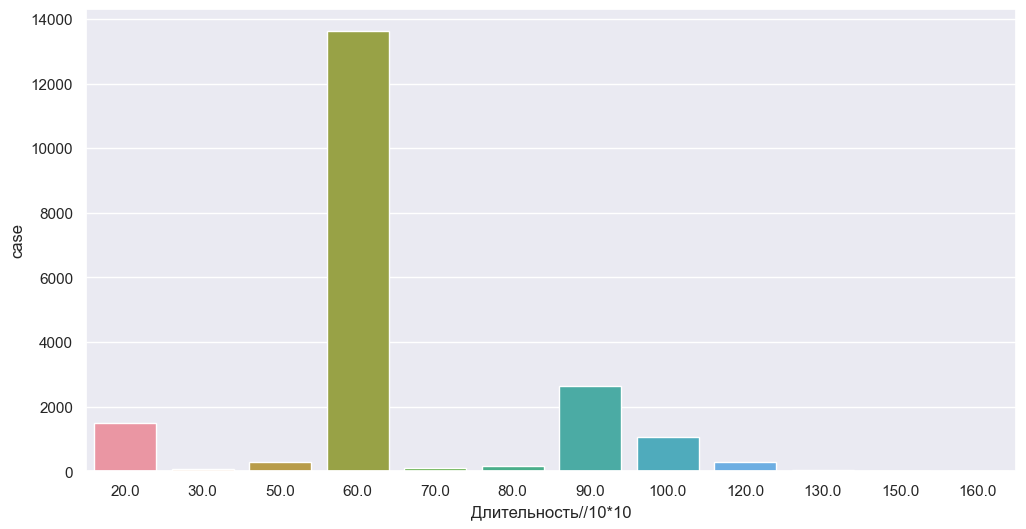

In [145]:
sns.barplot(chrono_distribution.reset_index(), x='Длительность//10*10', y = 'case')

In [146]:
des = stage_sum_pivot.describe(include='all').transpose().fillna(0)
des = des.drop(["25%", "75%"], axis=1).rename(columns={"50%":"median"})
des['mean/med'] = des['mean']/des['median']
des.sort_values("mean", ascending=False) #Отсортировал по СКО
round(des, 1)

,count,mean,std,min,median,max,mean/med
stage,,,,,,,
Доставка заказа,19781.0,29.4,9.6,0.0,33.0,35.0,0.9
Заказ доставлен,19781.0,0.1,0.2,0.0,0.0,1.0,inf
Заказ оформлен,19781.0,0.1,0.3,0.0,0.0,1.0,inf
Звонок клиенту,19781.0,0.4,1.2,0.0,0.0,19.0,inf
Оплата,19781.0,0.4,0.5,0.0,0.0,2.0,inf
Отмена заказа,19781.0,0.0,0.1,0.0,0.0,1.0,inf
Передача товара курьеру,19781.0,6.0,8.9,0.0,4.0,41.0,1.5
Поступление заказа сборщику,19781.0,2.3,5.8,0.0,1.0,66.0,2.3
Проверка заказа,19781.0,1.3,0.8,0.0,2.0,3.0,0.6


### Проверим на предмет выбросов те процессы, где наибольшее СКО

In [147]:
# Доставка заказа
call_distribution = stage_sum_pivot.loc[:, ["Доставка заказа"]].\
            reset_index().groupby("Доставка заказа").agg("count")

C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Доставка заказа', ylabel='case'>

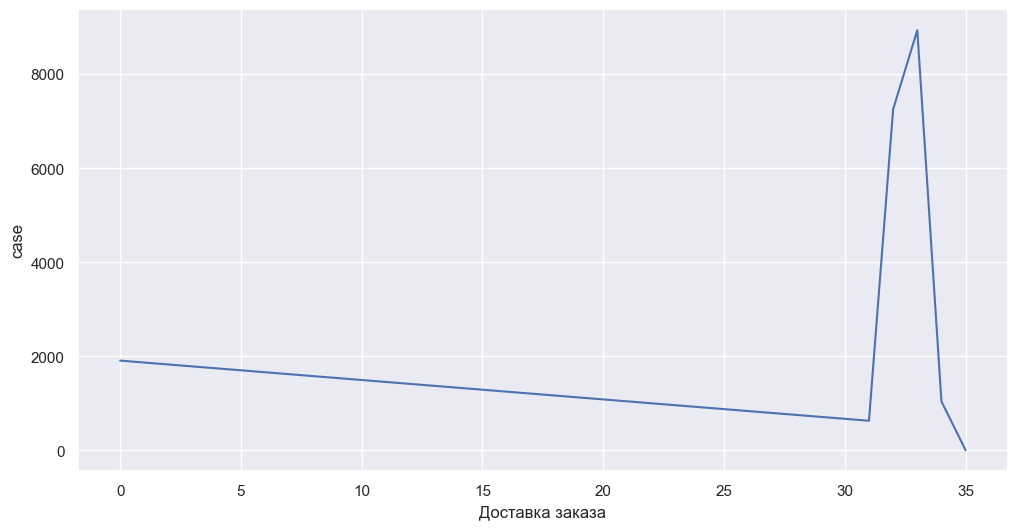

In [148]:
sns.lineplot(call_distribution, x="Доставка заказа", y='case')

In [149]:
# Звонок клиенту
call_distribution = stage_sum_pivot.loc[:, ["Звонок клиенту"]].\
            reset_index().groupby("Звонок клиенту").agg("count")

C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Звонок клиенту', ylabel='case'>

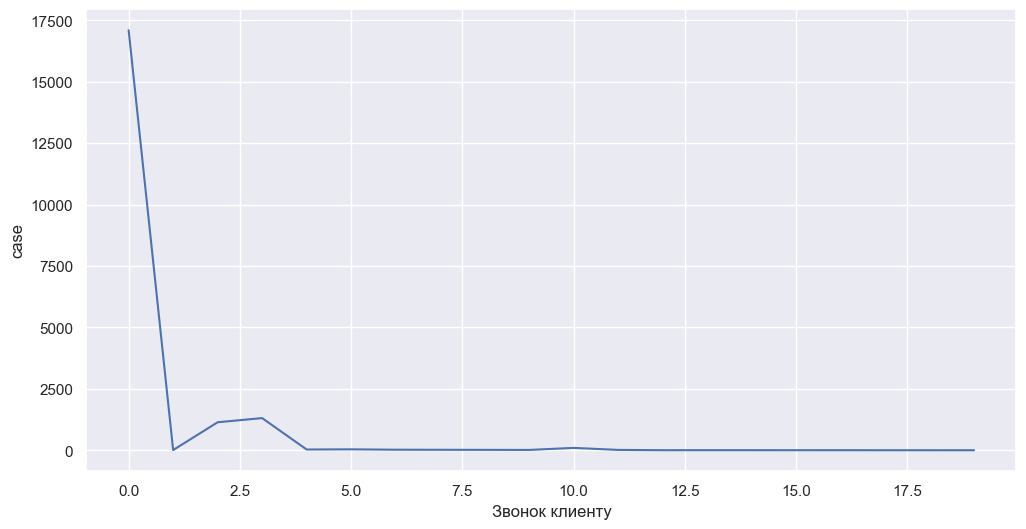

In [150]:
sns.lineplot(call_distribution, x="Звонок клиенту", y='case')

In [151]:
#Передача товара курьеру
call_distribution = stage_sum_pivot.loc[:, ["Передача товара курьеру"]].\
            reset_index().groupby("Передача товара курьеру").agg("count")

In [152]:
stage_sum_pivot.loc[:, ["Передача товара курьеру"]].\
sort_values(["Передача товара курьеру"], ascending=False).head()

stage,Передача товара курьеру
case,
20290270892,41.0
53416791462,41.0
61059079751,41.0
38251215748,41.0
86142483606,41.0


C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Передача товара курьеру', ylabel='case'>

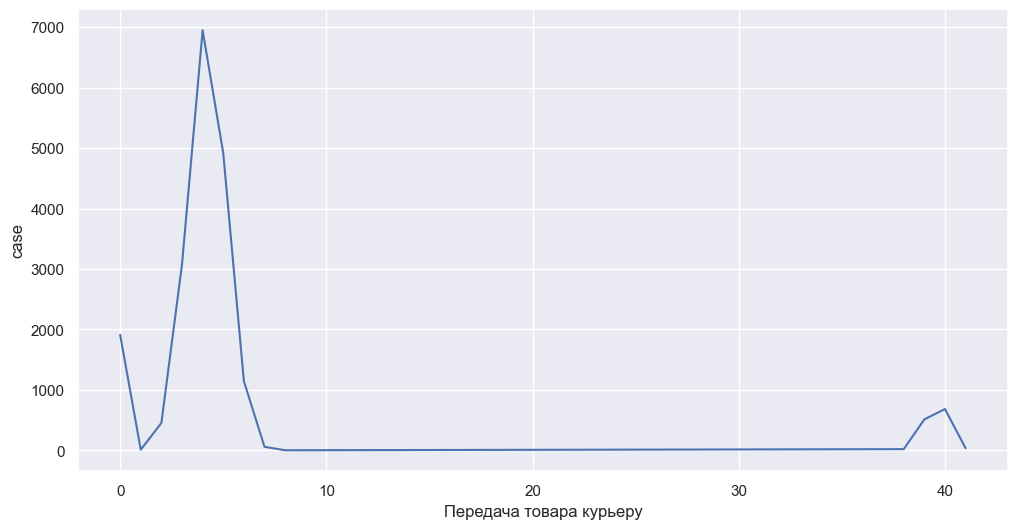

In [153]:
sns.lineplot(call_distribution, x="Передача товара курьеру", y='case')

In [154]:
#Сборка заказа
call_distribution = stage_sum_pivot.loc[:, ["Сборка заказа"]].reset_index().groupby("Сборка заказа").agg("count")
call_distribution

stage,case
Сборка заказа,
23.0,3767
24.0,12944
25.0,45
46.0,170
47.0,1010
48.0,1837
49.0,8


C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Сборка заказа', ylabel='case'>

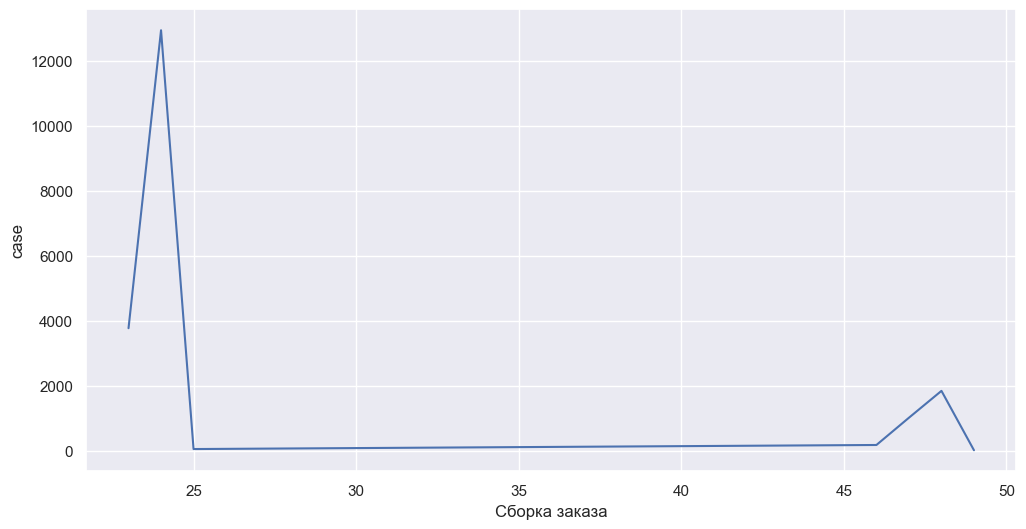

In [155]:
sns.lineplot(call_distribution, x="Сборка заказа", y='case')

In [156]:
#Поступление заказа сборщику
call_distribution = stage_sum_pivot.loc[:, ["Поступление заказа сборщику"]].\
        reset_index().groupby("Поступление заказа сборщику").agg("count")

C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Поступление заказа сборщику', ylabel='case'>

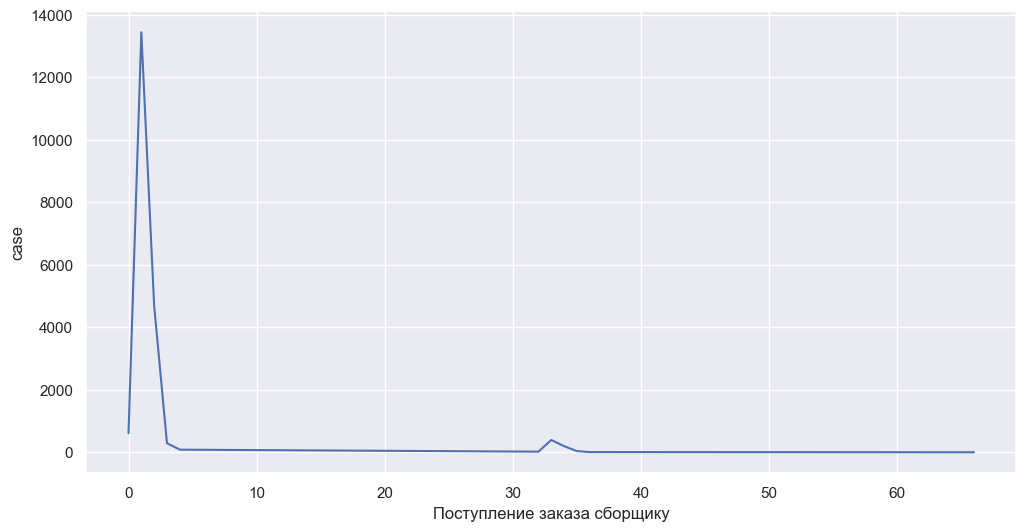

In [157]:
sns.lineplot(call_distribution, x="Поступление заказа сборщику", y='case')

In [158]:
#Звонок клиенту 
call_distribution = stage_sum_pivot.loc[:, ["Звонок клиенту"]].reset_index().groupby("Звонок клиенту").agg("count")

<Axes: xlabel='Звонок клиенту', ylabel='case'>

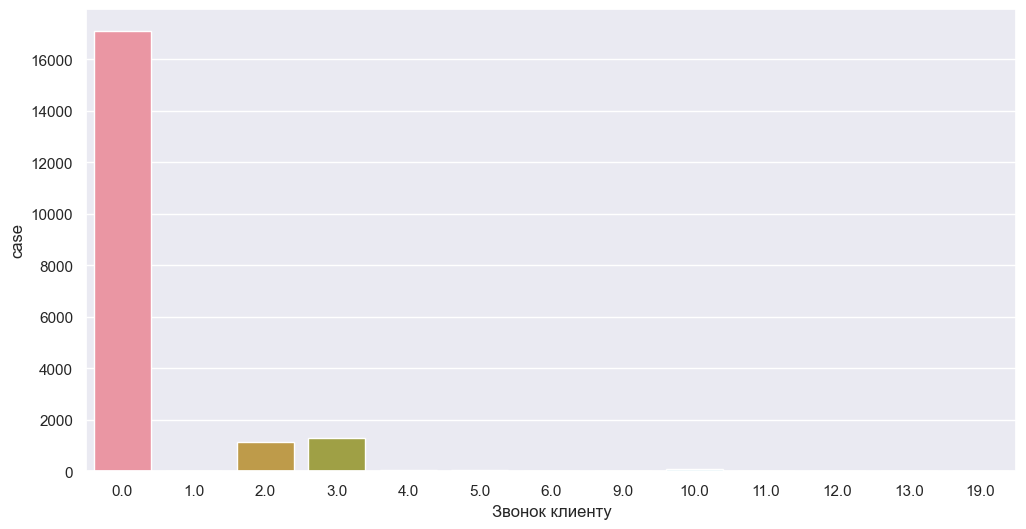

In [160]:
sns.barplot(call_distribution.reset_index(), x="Звонок клиенту", y='case')

In [161]:
des[(des["mean/med"] > 0.9) & (des["mean/med"] < 1.1) & (des["std"] > 0.3)]

,count,mean,std,min,median,max,mean/med
stage,,,,,,,
Упаковка товара,19781.0,2.039027,0.743488,0.0,2.0,8.0,1.019514
Длительность,19781.0,69.551691,18.607666,26.0,66.0,162.0,1.053814
Длительность//10*10,19781.0,64.217178,19.741764,20.0,60.0,160.0,1.070286


## Проверка SLA передачи заказов курьерам

In [ ]:
#Сводная таблица последнего времени выполнения каждой стадии для каждого кейса
gap_pivot = df.pivot_table(index = 'case',
              columns='stage',
              values = 'end_time',
              aggfunc="last")

In [ ]:
gap_pivot.head(3)

In [ ]:
#из неё выделим только Сборку и Передачу товара курьеру, так как нас только они интересуют
#и тут же удалим нулевые значения
gap_by_case = gap_pivot.loc[:, ["Сборка заказа", 'Передача товара курьеру']].dropna()

In [ ]:
gap_by_case.head(3)

In [ ]:
#"Владелец считает, что заказ передаётся курьеру в течение 30 минут после сборки"
#так что для SLA, как я понял, считаем время с конца сборки до конца передачи курьеру.

In [ ]:
#время между концом сборки заказа и концом передачи товара курьеру
gap_by_case['Длительность операций'] = \
    (gap_by_case["Передача товара курьеру"].astype('int64') - gap_by_case["Сборка заказа"].astype('int64'))// 10**9 / 60

In [ ]:
#число случаев, когда SLA выполняется
SLA_true_cases = gap_by_case[gap_by_case['Длительность операций']<=30].shape[0]
SLA_true_cases

In [ ]:
#число случаев, когда SLA не выполняется
SLA_false_cases = gap_by_case[gap_by_case['Длительность операций']>30].shape[0]
SLA_false_cases

In [ ]:
#SLA передачи заказов курьерам, т.е. процент вовремя переданных заказов (в течение 30 минут)
SLA = SLA_true_cases/(SLA_true_cases + SLA_false_cases)*100
SLA

In [ ]:
#сгруппируем длительность операций поминутно для того, чтоб построить график распределения 
gap_count = gap_by_case.groupby("Длительность операций").agg({"Сборка заказа": "count"}).\
                reset_index().rename(columns={"Сборка заказа":"Количество операций"})

In [ ]:
gap_count.head(3)

In [ ]:
#заполняю нулями пропуски, для графика нужно
for x in range(17, 38):
    gap_count.loc[len(gap_count.index)] = [x, 0] 
    
gap_count = gap_count.sort_values("Длительность операций")

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12,6)})
plt.style.use('dark_background')

In [ ]:
#раскрасим
palette = ['#ff0000' if x > 30 else '#00b0f0' for x in gap_count["Длительность операций"][:-3]]

In [ ]:
ax = sns.barplot(gap_count[:-3], x="Длительность операций", y="Количество операций", palette=palette)#обрезал выброс в конце
#график в логарифмической шкале, так как так лучше видно мелкие значения
ax.set_title("Проверка SLA")

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+0.5, end+0.5, 2));
ax.axvline(x = 26.0, ymin = 0, ymax = 1, color = '#ff0000', linewidth="3") 
plt.text(27, 420, "SLA = 30", size='large', color='#ff0000', fontweight="bold")

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plt.style.use('dark_background')
data = [SLA, 100-SLA]
labels = [f"SLA соблюдается; \n {SLA_true_cases}; {round(SLA)}%",\
          f"SLA нарушен; \n {SLA_false_cases}; {round(100-SLA)}%"]
plt.pie(data, labels=labels, colors = ['#00b0f0', '#ff0000'], startangle=120, textprops={'fontsize': 17
                                                                                        })

my_circle = plt.Circle((0, 0), 0.6, color='black')
p = plt.gcf()
p.gca().add_artist(my_circle)